In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install -U spacy
!python -m spacy download en
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047114 sha256=2b59909b82771e0636d5f0143691c216476ad94936e989276b0c955bc53ee661
  Stored in directory: C:\Users\bharg\AppData\Local\Temp\pip-ephem-wheel-cache-81e7i8vi\wheels\ee\4d\f7\563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\bharg\anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\bharg\anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you 

You do not have sufficient privilege to perform this operation.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Getting Data using API

In [2]:
ACCESS_TOKEN = "1142785474823520256-MtidVyBUmYopbrIC6hONNkRp4uWQQM"
ACCESS_TOKEN_SECRET = "7ZegrasMmeia4FX3jpXIoP3u9TnF2SpjbSf2NI0aF3t6g"
CONSUMER_KEY = "ouBy4vNEAFFBeZnpcwe0QZkiU"
CONSUMER_SECRET = "KuNo0hphQD4tej9YMNZGjAaVLJHIByUgqVIhJjYVY79ZZHuvQK"

In [4]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tweepy
import csv

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

csvFile = open('data.csv', 'w')
csvWriter = csv.writer(csvFile)

hash_tag_list = ["#coronavirus", "#quarantine", "#lockdown", "#wearamask", "#covid19", "#pandemic", "#socialdistancing", 
                  "#coronavirusoutbreak","#stayhome", "#workfromhome", "#staysafe", "#coronavaccine"]

for hash_tag in hash_tag_list:
  for tweet in tweepy.Cursor(api.search, q=hash_tag +" -filter:retweets", lang="en").items(1000):
    csvWriter.writerow([tweet.created_at, tweet.text, hash_tag]) 

UnicodeEncodeError: 'charmap' codec can't encode characters in position 120-121: character maps to <undefined>

In [1]:
import pandas as pd
data = pd.read_csv('data.csv', header=None)

In [2]:
data.head()

,0,1,2
0,2020-08-23 08:23:04,Come What May !\n#sundayvibes #SundayMorning #...,#coronavirus
1,2020-08-23 08:23:01,47-year-old with heart condition has died due...,#coronavirus
2,2020-08-23 08:22:53,"#Coronavirus : New £10,000 fines for organiser...",#coronavirus
3,2020-08-23 08:22:40,#Devotees flout #SocialDistancing norms while ...,#coronavirus
4,2020-08-23 08:22:36,ICYMI: President Trump today will hold a press...,#coronavirus


# Preprocessing

In [3]:
data.columns = ['Datetime', 'Tweet', 'Hashtag']

In [4]:
data.head(15)

,Datetime,Tweet,Hashtag
0,2020-08-23 08:23:04,Come What May !\n#sundayvibes #SundayMorning #...,#coronavirus
1,2020-08-23 08:23:01,47-year-old with heart condition has died due...,#coronavirus
2,2020-08-23 08:22:53,"#Coronavirus : New £10,000 fines for organiser...",#coronavirus
3,2020-08-23 08:22:40,#Devotees flout #SocialDistancing norms while ...,#coronavirus
4,2020-08-23 08:22:36,ICYMI: President Trump today will hold a press...,#coronavirus
5,2020-08-23 08:22:34,@BBCNews Chris Whitty says kids safe at #schoo...,#coronavirus
6,2020-08-23 08:22:24,"#Jordan arrests 1,000 #teachers in crackdown o...",#coronavirus
7,2020-08-23 08:22:01,I've been on a 14 day quarantine. Let me tell ...,#coronavirus
8,2020-08-23 08:21:44,I Know I am not alone \n\n@PhysicswallahAP #co...,#coronavirus
9,2020-08-23 08:21:08,Coronavirus - South Africa: Total number of CO...,#coronavirus


In [5]:
from datetime import datetime

for i in data.index:
  datetime_str = str(data['Datetime'][i])
  date_time = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
  data['Datetime'][i] = date_time

In [6]:
print(data['Tweet'][3])

#Devotees flout #SocialDistancing norms while immersing #Ganesha idols at #RKBeach in #Vizag.

📸| @Gsn_tnie… https://t.co/K3IQIMqBmL


In [7]:
for i in data.index:
  s = data['Tweet'][i]
  encoded_string = s.encode("ascii", "ignore")
  decoded_string = encoded_string.decode()
  data['Tweet'][i] = decoded_string

In [8]:
print(data['Tweet'][3])

#Devotees flout #SocialDistancing norms while immersing #Ganesha idols at #RKBeach in #Vizag.

| @Gsn_tnie https://t.co/K3IQIMqBmL


In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import string
punctuation = string.punctuation
punctuation = list(punctuation)
punctuation = punctuation + ["\n", "\t", "\s", "\'", '\"', "\\", "\r", "\b", "\f"]
stop_words = stop_words + punctuation 

remove_list = ["no","not","don’t","aren’t","couldn’t","didn’t",'don', "don't", 'should',"mustn’t","hasn’t","haven’t","doesn’t","hadn’t", "isn’t","mightn’t","needn’t", "shan’t", "shouldn’t","wasn’t","weren’t","won’t","wont","wouldn’t","can’t","don’t","aren’t","couldn’t","didn’t","mustnt","hasnt","havent","doesnt","hadnt", "isnt","mightnt","neednt", "shant", "shouldnt","wasnt","werent","wont","wouldnt","cant","donot","arenot","couldnot","didnot","mustnot","hasnot","havenot","doesnot","hadnot", "isnot","mightnot","neednot", "shallnot", "shouldnot","wasnot","werenot","willnot","wouldnot","cannot", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn', "wouldn't",]
stop_words = [word for word in stop_words if word not in remove_list]

# stop_words.append("RT")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tweet_tokens = [None]*len(data)
for i in data.index:
  tokens = data['Tweet'][i].split(' ')
  ans = []
  for w in tokens: 
    if (w.startswith('http:/') or w.startswith('https:/') or w.startswith('@')):
      continue;
    for j in punctuation:
      if w.find(j) != -1 :
        w = w.replace(j , ' ')
    if w == "" or w == " ":
      continue
    if w not in stop_words: 
      w = w.strip()
      ans.append(w)
  tweet_tokens[i] = ans

In [11]:
print(tweet_tokens[3])

['Devotees', 'flout', 'SocialDistancing', 'norms', 'immersing', 'Ganesha', 'idols', 'RKBeach', 'Vizag']


In [12]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

tweet_lemmatised = [None]*len(data)
for i in data.index:
  tweet_lemmatised[i] = [None] * len(tweet_tokens[i])
  for j in range (len(tweet_tokens[i])):
      tweet_lemmatised[i][j] = lemmatizer.lemmatize(tweet_tokens[i][j])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
print(tweet_lemmatised[3])

['Devotees', 'flout', 'SocialDistancing', 'norm', 'immersing', 'Ganesha', 'idol', 'RKBeach', 'Vizag']


In [14]:
cleaned_tweet = [None]*len(tweet_lemmatised)
for i in range(len(tweet_lemmatised)):
  cleaned_tweet[i] = " ".join(tweet_lemmatised[i])

In [15]:
print(cleaned_tweet[3])

Devotees flout SocialDistancing norm immersing Ganesha idol RKBeach Vizag


In [16]:
data['Cleaned Tweet'] = cleaned_tweet

In [17]:
data.head()

,Datetime,Tweet,Hashtag,Cleaned Tweet
0,2020-08-23 08:23:04,Come What May !\n#sundayvibes #SundayMorning #...,#coronavirus,Come What May sundayvibes SundayMorning COVID1...
1,2020-08-23 08:23:01,47-year-old with heart condition has died due...,#coronavirus,47 year old heart condition died due Covid 19 ...
2,2020-08-23 08:22:53,"#Coronavirus : New 10,000 fines for organisers...",#coronavirus,Coronavirus New 10 000 fine organiser illegal ...
3,2020-08-23 08:22:40,#Devotees flout #SocialDistancing norms while ...,#coronavirus,Devotees flout SocialDistancing norm immersing...
4,2020-08-23 08:22:36,ICYMI: President Trump today will hold a press...,#coronavirus,ICYMI President Trump today hold press confere...


# Dictionary Creation



In [ ]:
import pandas as pd
emotions_df = pd.read_csv("/content/drive/My Drive/College/IBM/emotions_dict.csv")
# emotions_df = pd.read_csv("/content/drive/My Drive/Unsupervised Sentiment Analysis/emotions_dict.csv")

In [18]:
emotions_df = pd.read_csv('emotions_dict.csv')

In [19]:
emotions_df.head()

,Emotion,Words
0,happy,happy;amazed;acknowledgement;admiration;alive;...
1,sad,sad;alienation;boredom;concern;condemnation;de...
2,anger,anger;agitation;angry;annoyance;anxious;aggrav...
3,fear,fear;alarm;anxious;aghast;apprehensive;awe;cau...
4,hurt,crushed;tormented;deprived;pained;tortured;dej...


In [20]:
trans_df = emotions_df.set_index("Emotion").T
emotions_dict = trans_df.to_dict("list")
print(emotions_dict)

{'happy': ['happy;amazed;acknowledgement;admiration;alive;amusement;appreciation;awe;blissful;calm;cheerful;confident\xa0;content;delight;determination;elation;ecstatic;energetic;enthusiastic;excitement;exuberant;fantastic;great;gay;joyous;lucky;fortunate;delighted;overjoyed;gleeful;thankful;important;festive;ecstatic;satisfied;glad;cheerful;sunny;merry;elated;jubilant\nflattery;fortunate;fulfillment;good;grateful;happy;hopeful;joyful;justification;optimistic;passionate;peaceful;pleasure;relaxation;relief;resolve;respect;satisfaction;secure;sensual;spiritual;terrific;thankful;tranquil;validation;playful;courageous;energetic;liberated;optimistic;provocative;impulsive;free;frisky;animated;spirited;thrilled;wonderful;great;gay;joyous;lucky;fortunate;delighted;overjoyed;gleeful;thankful;important;festive;ecstatic;satisfied;glad;cheerful;sunny;merry;elated;jubilant;Delighted;Ebullient;Ecstatic;Elated;Energetic;EnthusiasticEuphoric;Excited;Exhilarated;Overjoyed;Thrilled;Tickled pink;Vibrant;

In [21]:
emotions_dict['happy']

['happy;amazed;acknowledgement;admiration;alive;amusement;appreciation;awe;blissful;calm;cheerful;confident\xa0;content;delight;determination;elation;ecstatic;energetic;enthusiastic;excitement;exuberant;fantastic;great;gay;joyous;lucky;fortunate;delighted;overjoyed;gleeful;thankful;important;festive;ecstatic;satisfied;glad;cheerful;sunny;merry;elated;jubilant\nflattery;fortunate;fulfillment;good;grateful;happy;hopeful;joyful;justification;optimistic;passionate;peaceful;pleasure;relaxation;relief;resolve;respect;satisfaction;secure;sensual;spiritual;terrific;thankful;tranquil;validation;playful;courageous;energetic;liberated;optimistic;provocative;impulsive;free;frisky;animated;spirited;thrilled;wonderful;great;gay;joyous;lucky;fortunate;delighted;overjoyed;gleeful;thankful;important;festive;ecstatic;satisfied;glad;cheerful;sunny;merry;elated;jubilant;Delighted;Ebullient;Ecstatic;Elated;Energetic;EnthusiasticEuphoric;Excited;Exhilarated;Overjoyed;Thrilled;Tickled pink;Vibrant;Zippy;Aglo

In [22]:
emotions_dict['happy'].insert(0, 0.4)
emotions_dict['sad'].insert(0, 0.4)
emotions_dict['anger'].insert(0, 0.6)
emotions_dict['fear'].insert(0, 0.8)
emotions_dict['hurt'].insert(0, 0.6)
emotions_dict['depression'].insert(0, 0.6)
emotions_dict['positive'].insert(0, 0.3)
emotions_dict['negative'].insert(0, 0.9)
emotions_dict['lonliness'].insert(0, 0.7)
emotions_dict['confused'].insert(0, 0.5)

In [ ]:
emotions_dict

{'anger': [0.6,
  'anger;agitation;angry;annoyance;anxious;aggravation;betrayal;bitter;coercion;confusion;control;critical;deceive;disgust;dishonor;dismay;displeasure;distraught;domination;enrage;envious;exasperation;fed\xa0up;frustration;furious;harassment;hostile;humiliation;impatient;indignant;irritation;jealous;misunderstood;nervous;offensive;patronization;rage;rebellious;repulsion;resentful;ridicule;sabotage;sore;upset;uptight;vengeful;vindictive;vengeful;vindictive;irritated;enraged;hostile;insulting;sore;annoyed;upset;hateful;unpleasant;offensive;bitter;aggressive;resentful;inflamed;provoked;incensed;infuriated;cross;worked up;boiling;fuming;indignant;Affronted;Belligerent;Bitter;Burned up;Enraged;Fuming;Furious;Incensed;Infuriated;Intense;Outraged;Provoked;Seething;Storming;Truculent;Vengeful;Vindictive;Aggravated;Annoyed;Antagonistic;Crabby;Cranky;Exasperated;Fuming;Grouchy;Hostile;Ill-tempered;Indignant;Irate;Irritated;Offended;Ratty;Resentful;Sore;Spiteful;Testy;Ticked off;B

In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")
#nlp = spacy.load('en', disable=['parser', 'ner'])

In [29]:
for i in emotions_dict:
  word_list = emotions_dict[i]
  string_list = str(word_list[1])
  word_list = [x.lower().strip() for x in string_list.split(';')]
  word_lemmatised = [None]*len(word_list)
  for j in range(len(word_list)):
    doc = nlp(str(word_list[j]))
    word_lemmatised[j] = str("".join([token.lemma_ for token in doc]))
  emotions_dict[i][1] = word_lemmatised
  print(i, emotions_dict[i])

happy [0.4, ['happy', 'amazed', 'acknowledgement', 'admiration', 'alive', 'amusement', 'appreciation', 'awe', 'blissful', 'calm', 'cheerful', 'confident', 'content', 'delight', 'determination', 'elation', 'ecstatic', 'energetic', 'enthusiastic', 'excitement', 'exuberant', 'fantastic', 'great', 'gay', 'joyous', 'lucky', 'fortunate', 'delighted', 'overjoyed', 'gleeful', 'thankful', 'important', 'festive', 'ecstatic', 'satisfied', 'glad', 'cheerful', 'sunny', 'merry', 'elated', 'jubilant\nflattery', 'fortunate', 'fulfillment', 'good', 'grateful', 'happy', 'hopeful', 'joyful', 'justification', 'optimistic', 'passionate', 'peaceful', 'pleasure', 'relaxation', 'relief', 'resolve', 'respect', 'satisfaction', 'secure', 'sensual', 'spiritual', 'terrific', 'thankful', 'tranquil', 'validation', 'playful', 'courageous', 'energetic', 'liberate', 'optimistic', 'provocative', 'impulsive', 'free', 'frisky', 'animate', 'spirited', 'thrill', 'wonderful', 'great', 'gay', 'joyous', 'lucky', 'fortunate', '

lonliness [0.7, ['incapable', 'alone', 'paralyzed', 'fatigue', 'useless', 'inferior', 'vulnerable', 'empty', 'force', 'hesitant', 'despair', 'frustrated', 'distressed', 'woeful', 'pathetic', 'tragic', 'dominate', 'abandon', 'black', 'cutoff', 'desert', 'destroy', 'empty', 'forsake', 'isolate', 'maroon', 'neglect', 'ostracize', 'outcast', 'reject', 'shun', 'alienated', 'alone', 'apart', 'cheerless', 'companionless', 'deject', 'despondent', 'estranged', 'exclude', 'leaveout', 'leftover', 'lonely', 'oppress', 'uncherished', 'blue', 'detach', 'discourage', 'distant', 'insulate', 'melancholy', 'remote', 'separate', 'withdraw']]
confused [0.5, ['upset', 'doubtful', 'uncertain', 'indecisive', 'perplex', 'embarrassed', 'hesitant', 'shy', 'stupefy', 'disillusion', 'unbelieving', 'skeptical', 'distrustful', 'misgive', 'lose', 'unsure', 'uneasy', 'pessimistic', 'tense', 'baffle', 'befuddle', 'chaotic', 'confound', 'confused', 'dizzy', 'fluster', 'rattle', 'reel', 'shock', 'shakeup', 'speechless',

# Model

In [30]:
data['Sentiment'] = 'Neutral'

In [31]:
from nltk.corpus import wordnet
def findEmotion(word):
  count = 0
  for emotion in emotions_dict.keys():
    word_list = emotions_dict[emotion][1]
    if word in word_list:
      count += 1
      return emotion

  if count == 0:
    synonym_list = []
    for synonym in wordnet.synsets(word):
      for s in synonym.lemmas():
        synonym_list.append(s.name())
    for s in synonym_list:
      for emotion in emotions_dict.keys():
        word_list = emotions_dict[emotion][1]
        if s in word_list:
          emotions_dict[emotion][1].append(word)
          return emotion
  return "Neutral"


In [32]:
def findSentiment(data):
  for i in range(20):
    sentiment_dict = {}
    tweet = data['Cleaned Tweet'][i]
    word_list = tweet.split(' ')
    word_list = [x.lower() for x in word_list]
    for word in word_list:
      tokenized = nltk.word_tokenize(word)
      pos = nltk.pos_tag(tokenized)
      if pos and pos[0][1] in ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'MD']:
        if word in emotions_dict.keys():
          if word in sentiment_dict:
            sentiment_dict[word] += 1
          else:
            sentiment_dict[word] = 1            
        else:
          word_emotion = findEmotion(word)
          if word_emotion in sentiment_dict:
            sentiment_dict[word_emotion] += 1
          else:
            sentiment_dict[word_emotion] = 1
    if not sentiment_dict:
      data['Sentiment'][i] = "Neutral"
    elif list(sentiment_dict.keys()) == ['Neutral']:
      data['Sentiment'][i] = "Neutral"
    else:
      if 'Neutral' in sentiment_dict.keys():
        x = sentiment_dict.pop('Neutral')
      for k in sentiment_dict:
        weight = emotions_dict[k][0]
        sentiment_dict[k] *= weight
      answer = max(sentiment_dict, key=sentiment_dict.get)
      data['Sentiment'][i] = answer

In [33]:
findSentiment(data)

In [34]:
data.head(20)

,Datetime,Tweet,Hashtag,Cleaned Tweet,Sentiment
0,2020-08-23 08:23:04,Come What May !\n#sundayvibes #SundayMorning #...,#coronavirus,Come What May sundayvibes SundayMorning COVID1...,Neutral
1,2020-08-23 08:23:01,47-year-old with heart condition has died due...,#coronavirus,47 year old heart condition died due Covid 19 ...,Neutral
2,2020-08-23 08:22:53,"#Coronavirus : New 10,000 fines for organisers...",#coronavirus,Coronavirus New 10 000 fine organiser illegal ...,Neutral
3,2020-08-23 08:22:40,#Devotees flout #SocialDistancing norms while ...,#coronavirus,Devotees flout SocialDistancing norm immersing...,Neutral
4,2020-08-23 08:22:36,ICYMI: President Trump today will hold a press...,#coronavirus,ICYMI President Trump today hold press confere...,Neutral
5,2020-08-23 08:22:34,@BBCNews Chris Whitty says kids safe at #schoo...,#coronavirus,Chris Whitty say kid safe school caught Covid1...,happy
6,2020-08-23 08:22:24,"#Jordan arrests 1,000 #teachers in crackdown o...",#coronavirus,Jordan arrest 1 000 teacher crackdown union ...,Neutral
7,2020-08-23 08:22:01,I've been on a 14 day quarantine. Let me tell ...,#coronavirus,I ve 14 day quarantine Let tell late I going w...,Neutral
8,2020-08-23 08:21:44,I Know I am not alone \n\n@PhysicswallahAP #co...,#coronavirus,I Know I not alone PhysicswallahAP coronavirus...,negative
9,2020-08-23 08:21:08,Coronavirus - South Africa: Total number of CO...,#coronavirus,Coronavirus South Africa Total number COVID 19...,Neutral


# Visulaisation

{'confused': 3281, 'Neutral': 3271, 'happy': 998, 'negative': 496, 'sad': 257, 'positive': 965, 'depression': 500, 'hurt': 93, 'anger': 171, 'fear': 64, 'lonliness': 226}


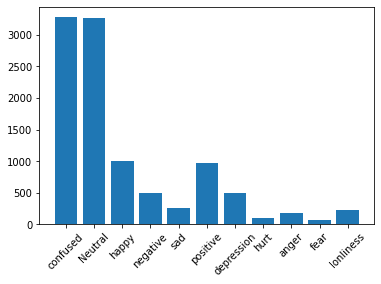

In [ ]:
# bar chart
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

data_new = data[1:20]
data_new.head(20)

sentiments = list(data['Sentiment'])
sentiments = dict(Counter(sentiments))
print(sentiments)

emotions = sentiments.keys()
freq = sentiments.values()
plt.bar(emotions, freq)
plt.xticks(rotation=45)
plt.show()

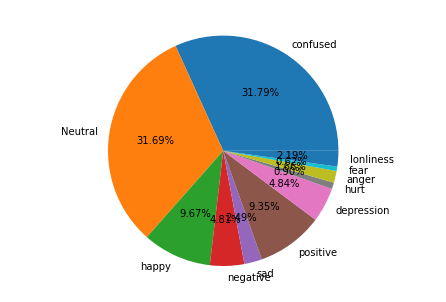

In [ ]:
# pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(freq, labels = emotions,autopct='%1.2f%%')
plt.show()

In [ ]:
emotions_dict.values()

dict_values([[0.4, ['happy', 'amazed', 'acknowledgement', 'admiration', 'alive', 'amusement', 'appreciation', 'awe', 'blissful', 'calm', 'cheerful', 'confident', 'content', 'delight', 'determination', 'elation', 'ecstatic', 'energetic', 'enthusiastic', 'excitement', 'exuberant', 'fantastic', 'great', 'gay', 'joyous', 'lucky', 'fortunate', 'delighted', 'overjoyed', 'gleeful', 'thankful', 'important', 'festive', 'ecstatic', 'satisfied', 'glad', 'cheerful', 'sunny', 'merry', 'elated', 'jubilant\nflattery', 'fortunate', 'fulfillment', 'good', 'grateful', 'happy', 'hopeful', 'joyful', 'justification', 'optimistic', 'passionate', 'peaceful', 'pleasure', 'relaxation', 'relief', 'resolve', 'respect', 'satisfaction', 'secure', 'sensual', 'spiritual', 'terrific', 'thankful', 'tranquil', 'validation', 'playful', 'courageous', 'energetic', 'liberate', 'optimistic', 'provocative', 'impulsive', 'free', 'frisky', 'animate', 'spirited', 'thrill', 'wonderful', 'great', 'gay', 'joyous', 'lucky', 'fortun

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator  # Generate wordclouds
from PIL import Image  # Load images from files

fog_machine = WordCloud()  # Create a wordcloud generator 
fog_machine.generate(emotions_dict.values())  # Generate the cloud using raw text
fog_machine.to_image()